In [3]:
import numpy as np
from six.moves import cPickle
import matplotlib.pyplot as plt

# 1. 일단 train wav파일과 label파일을 load 하자

- wav file load
    - fs : 신호 길이, 데이터들 보아하니 신호길이는 16000(1초?)로 동일한걸로 보임
    - data : 데이터 정보

In [215]:
from scipy.io import wavfile
file_num = '00002'
fs, signal = wavfile.read('./train/train_{}.wav'.format(file_num))

In [216]:
fs

16000

In [217]:
signal.shape

(16000,)

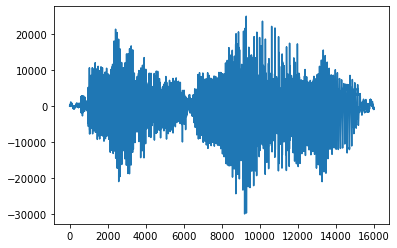

In [218]:
plt.plot(signal)
plt.show()

- 음성데이터 stft 돌려서 상황을보자
    - ?이거 막상할라니까 STFT를 잘모름 : 시계열을 일정한 시간 구간으로 나누고 각 구간에 대해 FFT를 통해서 주파수 스펙트럼을 만들어내는 방법정도?
    - 최소 nfft, hop_length 정도는 알아야지

In [219]:
import librosa

In [220]:
signal

array([  -5,   64,  -99, ..., -884, -856, -759], dtype=int16)

- STFT 결과

In [221]:
nfft=160
hop_length = int(fs/nfft)
stft_result = librosa.stft(np.float32(signal), n_fft=nfft, hop_length=hop_length)
print(stft_result.shape)
stft_result_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

(81, 161)


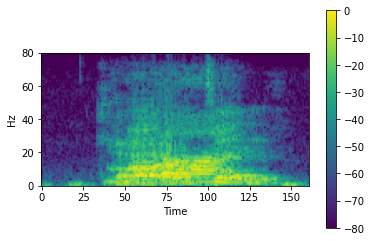

In [212]:
plt.imshow(stft_result_db)
plt.colorbar()
plt.ylabel('Hz')
plt.ylim(0, nfft/2)
plt.xlabel('Time')
plt.show()

- 멜 스펙트럼은 주파수의 단위를 멜 단위(mel unit)로 바꾼 스펙트럼
    - 멜단위는 사람이 귀로 들었을때 주로 들리는 부분을 강조하는 새로운 단위? 정도로 이해하면될듯함
    - 위랑 아래 비교해보면 아래쪽 주파수영역이 좀더 강조된 결과처럼 보이는걸 알 수 있다.

In [213]:
hop_length = int(fs/nfft)
n_mles = nfft/2
mel_result = librosa.feature.melspectrogram(y=np.float32(signal), sr=fs, n_mels=n_mles, hop_length=hop_length)
mel_result_db = librosa.power_to_db(mel_result, ref=np.max)
print (mel_result_db.shape)

(80, 161)


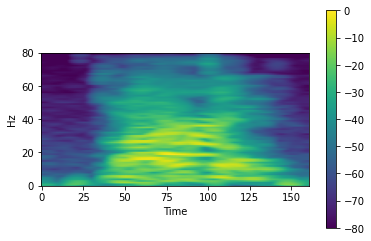

In [223]:
plt.imshow(mel_result_db)
plt.colorbar()
plt.ylabel('Hz')
plt.ylim(0, nfft/2)
plt.xlabel('Time')
plt.show()

- label data(csv file) load
    - 와.. 데이터 10만개
    - 일단 이렇게하고 전체 행렬을 끄집어내야할듯

In [204]:
import pandas as pd

In [17]:
label_df = pd.read_csv('./train_answer.csv')
label_df

,id,bed,bird,cat,dog,down,eight,five,four,go,...,sheila,six,stop,three,tree,two,up,wow,yes,zero
0,0,0.00,0.0,0.00,0.00,0.0,0.00,0.25,0.00,0.00,...,0.0,0.0,0.25,0.0,0.0,0.00,0.0,0.0,0.00,0.0
1,1,0.00,0.0,0.25,0.00,0.0,0.00,0.25,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
2,2,0.00,0.0,0.00,0.25,0.0,0.00,0.25,0.25,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
3,3,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.25,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
4,4,0.00,0.0,0.00,0.00,0.0,0.25,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0.00,0.0,0.00,0.00,0.0,0.25,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.25,0.0,0.0,0.00,0.0
99996,99996,0.25,0.0,0.00,0.00,0.0,0.00,0.00,0.25,0.25,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
99997,99997,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.25,...,0.0,0.0,0.00,0.5,0.0,0.00,0.0,0.0,0.00,0.0
99998,99998,0.25,0.0,0.00,0.00,0.0,0.25,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [22]:
label_array = label_df.values
label_array.shape

(100000, 31)